# Assignment 2

* In this assignment, we will train a CNN classifier with brain tumor dataset.

# Environment
* Use the following lines to import any needed libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

from glob import glob
import os
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy import expand_dims

import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from IPython.display import Image, display
from PIL import Image

import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


# Data
* Dataset ref: https://www.kaggle.com/masoudnickparvar/brain-tumor-mri-dataset
* Load the datasets and display.
* There are 4types of images in this dataset, including 3 types of images with brain tumors(glioma, meningioma, notumor, pituitary) and 1 type of images without brain tumor.

In [2]:
# In this block, please 

# 1. load images from 2 folders(Training, Testing)
#     Structure:
#         For Training data:
#             ----brain_tumor
#                 ----Training
#                     ----glioma
#                     ----meningioma
#                     ----notumor
#                     ----pituitary
#         For Testing data:
#             ----brain_tumor
#                 ----Testing
#                     ----glioma
#                     ----meningioma
#                     ----notumor
#                     ----pituitary    

# 2. Set image labels to corresponding class(variable type: int)
#     Type          Class
#     ===================
#     glioma        0
#     meningioma    1
#     notumor       2
#     pituitary     3
    
# 3. Get train images, test image, train labels, test labels in this block

# 4. Print the image number for each class in training and testing dataset.


img_width, img_height = 256, 256

files1 = sorted(glob('./brain_tumor/archive/Training/glioma/*.jpg'))
files2 = sorted(glob('./brain_tumor/archive/Training/meningioma/*.jpg'))
files3 = sorted(glob('./brain_tumor/archive/Training/notumor/*.jpg'))
files4 = sorted(glob('./brain_tumor/archive/Training/pituitary/*.jpg'))

labels = []
for i in range(len(files1)):
    labels.append(0)
for i in range(len(files2)):
    labels.append(1)
for i in range(len(files3)):
    labels.append(2)
for i in range(len(files4)):
    labels.append(3)

images = np.empty((len(files1)+len(files2)+len(files3)+len(files4), img_width, img_height))


for i, _file1 in enumerate(files1):
    images[i, :, :] = cv2.resize(cv2.imread(_file1, 0), (img_width, img_height))

for i, _file2 in enumerate(files2):
    images[i+len(files1), :, :] = cv2.resize(cv2.imread(_file2, 0), (img_width, img_height))

for i, _file3 in enumerate(files3):
    images[i+len(files1)+len(files2), :, :] = cv2.resize(cv2.imread(_file3, 0), (img_width, img_height))
    
for i, _file4 in enumerate(files4):
    images[i+len(files1)+len(files2)+len(files3), :, :] = cv2.resize(cv2.imread(_file4, 0), (img_width, img_height))

print(len(files1))
print(len(files2))
print(len(files3))
print(len(files4))


t_files1 = sorted(glob('./brain_tumor/archive/Testing/glioma/*.jpg'))
t_files2 = sorted(glob('./brain_tumor/archive/Testing/meningioma/*.jpg'))
t_files3 = sorted(glob('./brain_tumor/archive/Testing/notumor/*.jpg'))
t_files4 = sorted(glob('./brain_tumor/archive/Testing/pituitary/*.jpg'))

t_labels = []
for i in range(len(t_files1)):
    t_labels.append(0)
for i in range(len(t_files2)):
    t_labels.append(1)
for i in range(len(t_files3)):
    t_labels.append(2)
for i in range(len(t_files4)):
    t_labels.append(3)

t_images = np.empty((len(t_files1)+len(t_files2)+len(t_files3)+len(t_files4), img_width, img_height))


for i, _t_file1 in enumerate(t_files1):
    t_images[i, :, :] = cv2.resize(cv2.imread(_t_file1, 0), (img_width, img_height))

for i, _t_file2 in enumerate(t_files2):
    t_images[i+len(t_files1), :, :] = cv2.resize(cv2.imread(_t_file2, 0), (img_width, img_height))

for i, _t_file3 in enumerate(t_files3):
    t_images[i+len(t_files1)+len(t_files2), :, :] = cv2.resize(cv2.imread(_t_file3, 0), (img_width, img_height))
    
for i, _t_file4 in enumerate(t_files4):
    t_images[i+len(t_files1)+len(t_files2)+len(t_files3), :, :] = cv2.resize(cv2.imread(_t_file4, 0), (img_width, img_height))

print(len(t_files1))
print(len(t_files2))
print(len(t_files3))
print(len(t_files4))
# print(labels)

1321
1339
1595
1457
300
306
405
300


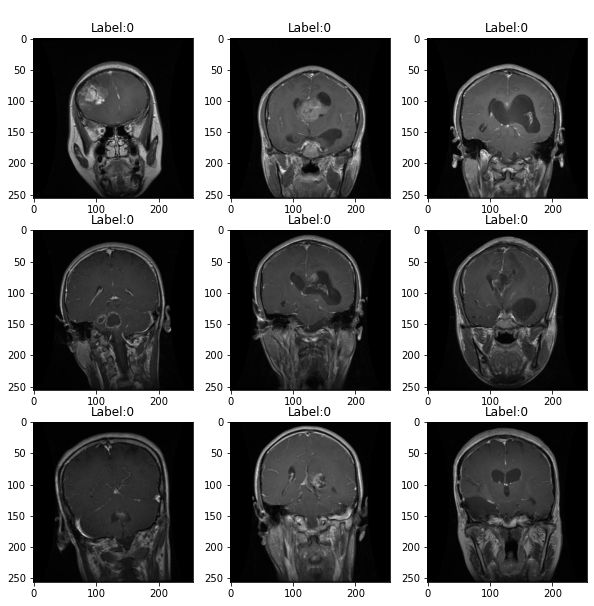

In [3]:
# Display 9 images in dataset, and show corresponding labels
plt.figure(figsize=(10, 10))
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.title("\nLabel:{}".format(labels[i]))
plt.show()

In [4]:
print(labels.count(0))
print(labels.count(1))
print(labels.count(2))
print(labels.count(3))

1321
1339
1595
1457


# Splitting dataset

In [5]:
num_classes = 4
# Convert training and testing labels to one hot encoding 
labels = keras.utils.to_categorical(labels, num_classes)
t_labels = keras.utils.to_categorical(t_labels, num_classes)

train_images = images
test_images = t_images

train_labels =  labels
test_labels = t_labels

# Split testing dataset into validation dataset and testing dataset.(validation:testing =  1:1)
val_images, test_images, val_labels, test_labels = train_test_split(t_images, t_labels, test_size=0.5, random_state=1)

print((len(train_images), len(val_images), len(test_images)))

(5712, 655, 656)


# Define the model

In [6]:
# Build model using Keras.
# use keras Sequential. Usage: https://keras.io/api/models/sequential/
input_shape = (img_height, img_width, 1)
SIIM_custom_model = Sequential()
SIIM_custom_model.add(Conv2D(32, (3, 3), input_shape=input_shape))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))
SIIM_custom_model.add(Conv2D(32, (3, 3)))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))
SIIM_custom_model.add(Conv2D(64, (3, 3)))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))
SIIM_custom_model.add(Flatten())
SIIM_custom_model.add(Dense(num_classes))
SIIM_custom_model.add(Activation('softmax'))
SIIM_custom_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Show model   
SIIM_custom_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        1

# Display feature maps 

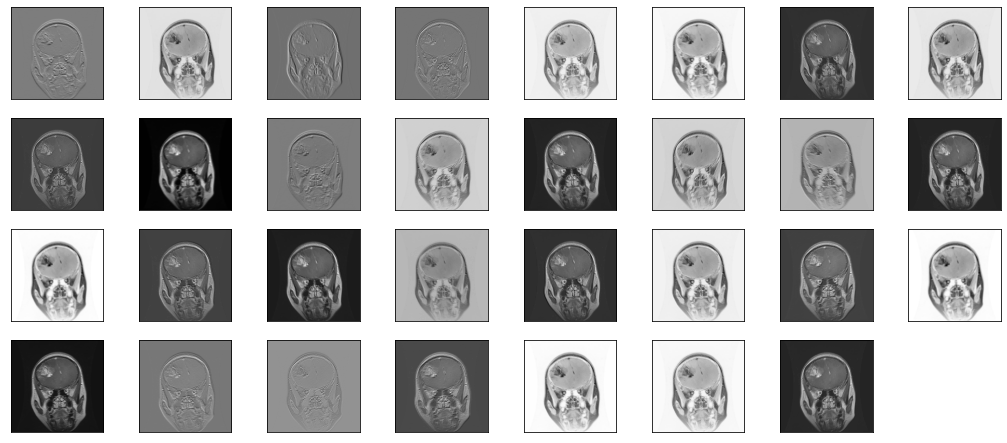

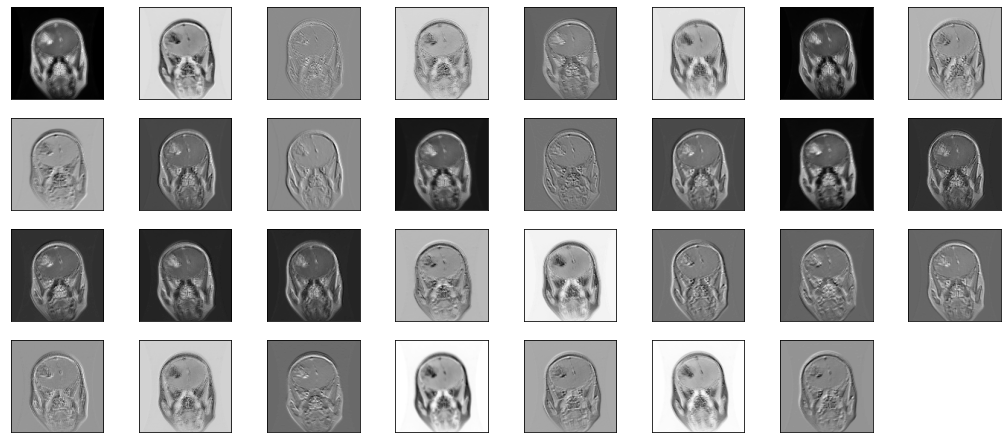

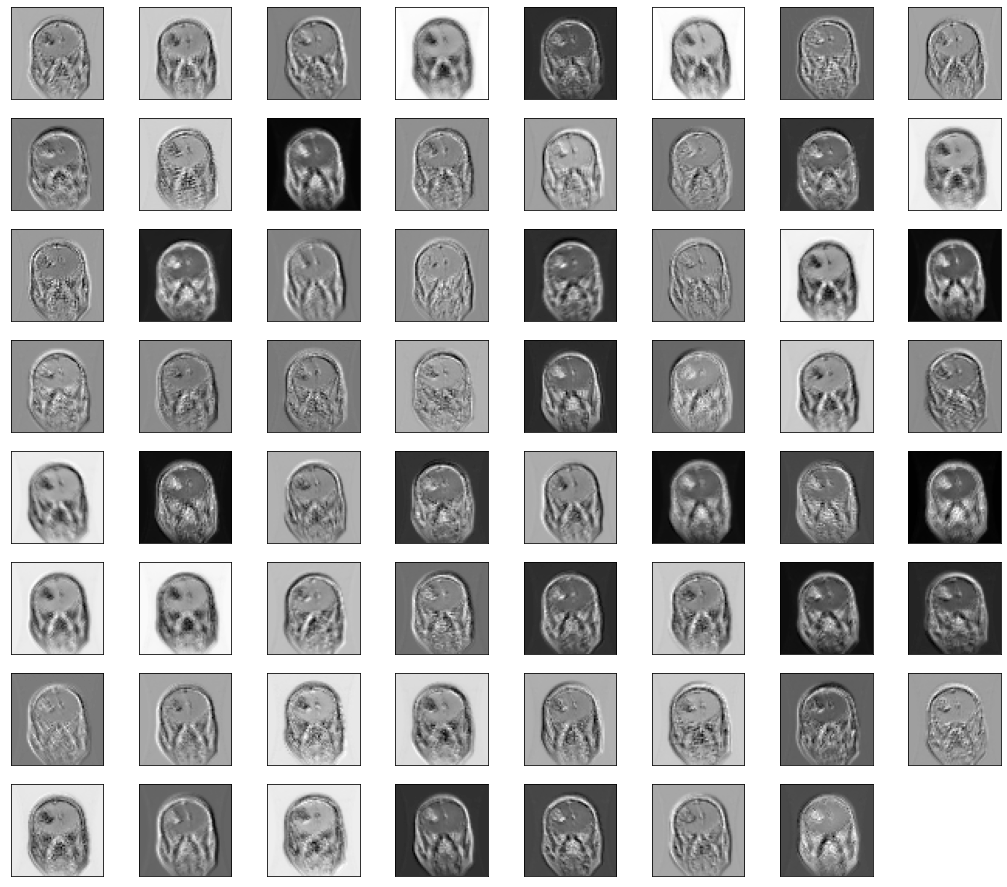

In [8]:
# Display at least 2 different level ffeature maps 
conv_list = [0, 3, 6]

for c_layer in conv_list:
    feature_extractor = keras.Model(
        inputs=SIIM_custom_model.inputs,
        outputs=SIIM_custom_model.layers[c_layer].output,
    )
    img = train_images[0, :, :]
    img = expand_dims(img, axis=0)
    feature_maps = feature_extractor.predict(img)
    num_map = SIIM_custom_model.layers[c_layer].output.shape[3]
    plt.figure(figsize=(18, 16))
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
            ix += 1
            if ix==num_map:
                break
        if ix==num_map:
            break
    plt.show()
    print("="*50)

# Model fitting

In [9]:
seed(1337)
tf.random.set_seed(1337)

nb_train_samples = len(train_images)
nb_validation_samples = len(val_images)
epochs = 30
batch_size = 10

# Use Keras ImageDataGenerator to rescale dataset
# Usage: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerat： 
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow(train_images[..., np.newaxis],train_labels, batch_size = batch_size)
validation_generator = val_datagen.flow(val_images[..., np.newaxis], val_labels, batch_size = batch_size)

# model fitting (use  function "fit_generator")
history = SIIM_custom_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
571/571 [==============================] - 6s 9ms/step - loss: 0.5715 - accuracy: 0.7781 - val_loss: 0.5127 - val_accuracy: 0.8062
Epoch 2/30
571/571 [==============================] - 5s 9ms/step - loss: 0.2753 - accuracy: 0.8948 - val_loss: 0.3405 - val_accuracy: 0.8708
Epoch 3/30
571/571 [==============================] - 5s 9ms/step - loss: 0.1655 - accuracy: 0.9416 - val_loss: 0.3023 - val_accuracy: 0.8892
Epoch 4/30
571/571 [==============================] - 5s 9ms/step - loss: 0.0837 - accuracy: 0.9711 - val_loss: 0.1733 - val_accuracy: 0.9508
Epoch 5/30
571/571 [==============================] - 5s 9ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.1704 - val_accuracy: 0.9492
Epoch 6/30
571/571 [==============================] - 5s 9ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.2284 - val_accuracy: 0.9508
Epoch 7/30
571/571 [==============================] - 5s 9ms/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.2049 - val_accuracy: 0.9554
Epoch 

# Plot training & validation history
* 2 Figures: loss and accuaracy

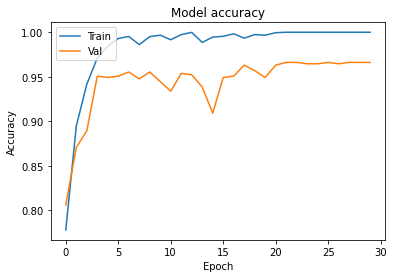

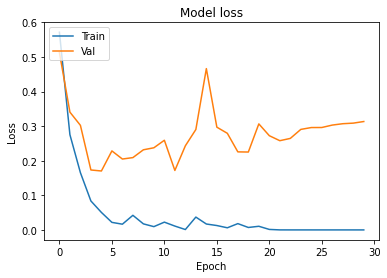

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Predict and show accuracy
* 2 Figures: loss and accuaracy

In [11]:
prediction = (SIIM_custom_model.predict(test_images[..., np.newaxis] / 255.))
prediction = prediction.tolist()
score=0
for i in range(len(prediction)):
    num = max(prediction[i])
    prediction[i]=prediction[i].index(num)

for i, j in zip(prediction, test_labels):
    if [i]==np.where(j==1)[0]:
        score = score+1.0

score = score/len(prediction)
print(score)

0.9679878048780488
[0, 0, 1, 1, 0, 3, 3, 0, 1, 1, 3, 2, 3, 1, 2, 0, 2, 3, 2, 2, 2, 3, 0, 2, 3, 0, 2, 3, 2, 3, 3, 3, 3, 3, 1, 0, 2, 0, 1, 0, 1, 2, 1, 3, 2, 2, 0, 0, 1, 1, 1, 3, 3, 2, 2, 1, 0, 2, 0, 2, 3, 1, 1, 3, 0, 3, 2, 1, 3, 2, 0, 2, 1, 2, 1, 2, 3, 3, 0, 0, 2, 2, 2, 0, 1, 2, 0, 3, 2, 0, 0, 3, 3, 1, 1, 2, 1, 1, 0, 1, 3, 3, 3, 2, 0, 0, 3, 2, 3, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 3, 1, 1, 1, 2, 2, 1, 0, 3, 0, 0, 3, 3, 2, 2, 0, 3, 3, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 3, 1, 1, 2, 2, 1, 3, 3, 2, 1, 2, 0, 1, 3, 0, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 3, 3, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 3, 2, 2, 2, 0, 1, 2, 1, 3, 2, 2, 1, 1, 0, 2, 1, 0, 2, 3, 2, 1, 0, 3, 2, 3, 1, 1, 0, 3, 2, 2, 3, 2, 1, 3, 0, 3, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 3, 3, 2, 0, 1, 0, 1, 0, 1, 1, 0, 3, 0, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 3, 0, 3, 0, 3, 1, 3, 0, 0, 1, 2, 2, 2, 3, 0, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 3, 1, 1, 2, 1, 0, 3, 2, 3, 1, 2, 2, 2, 1, 2, 0, 2, 0, 3, 0, 0, 3, 0, 2, 0, 1, 0, 0, 2, 0,

#  Grad-cam 

* select one images from test dataset and show its heatmap
* Usage: https://keras.io/examples/vision/grad_cam/

In [12]:
# https://keras.io/examples/vision/grad_cam/
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
# https://keras.io/guides/sequential_model/

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

* Superimposed  heatmap  on original image and display it. 

In [13]:
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    heatmap = np.uint8(255 * heatmap)
    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")
    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    imgt = jet_colors[img]
    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[0], img.shape[1]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    # Display Grad CAM
    display(superimposed_img.resize((512,512))) 
    plt.matshow(test_images[test_img_index,:,:], cmap='gray')
    plt.show()

[1. 0. 0. 0.]


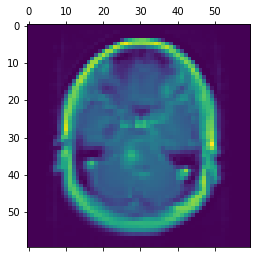

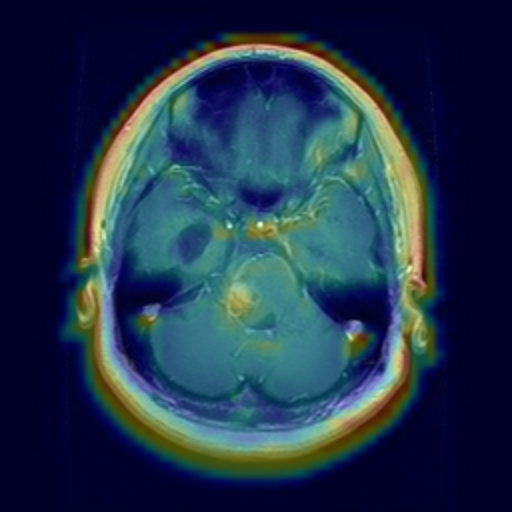

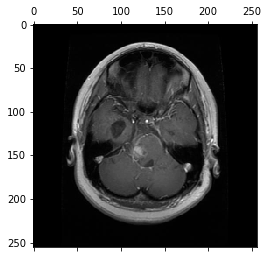

[0. 0. 0. 1.]


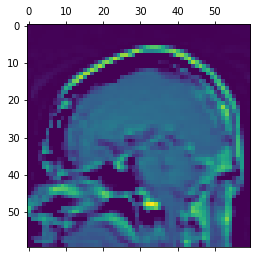

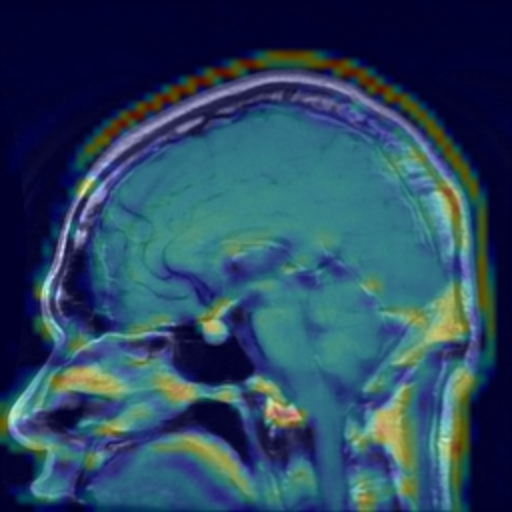

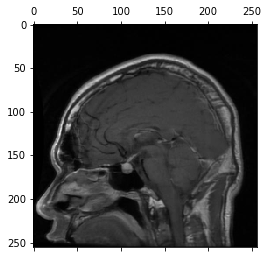

[0. 0. 0. 1.]


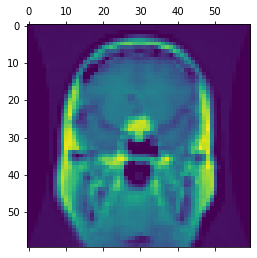

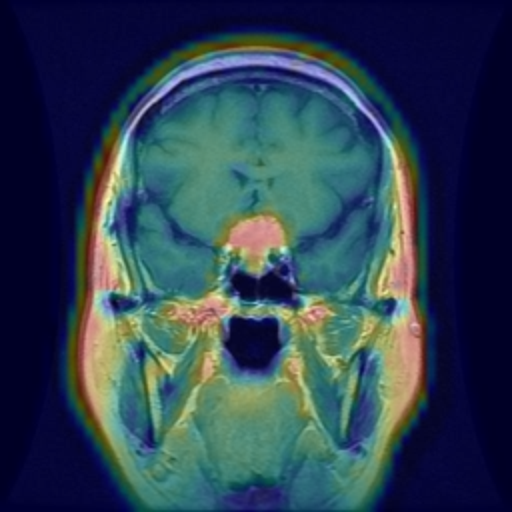

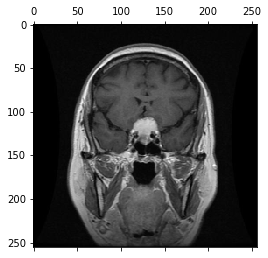

[0. 0. 1. 0.]


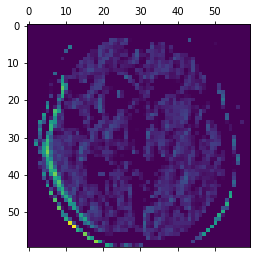

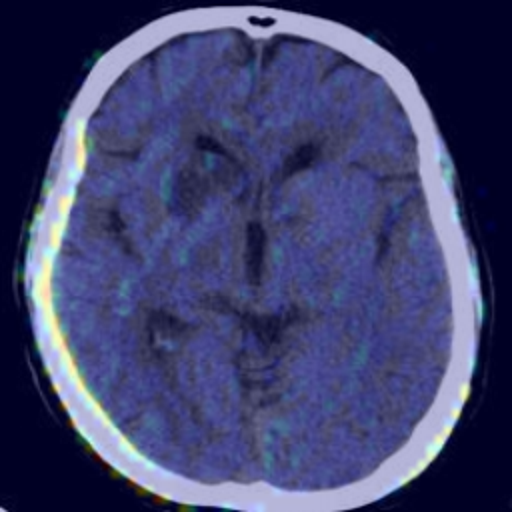

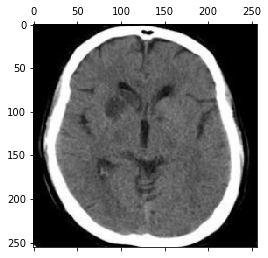

[0. 0. 1. 0.]


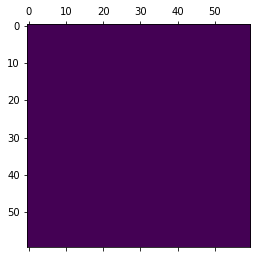

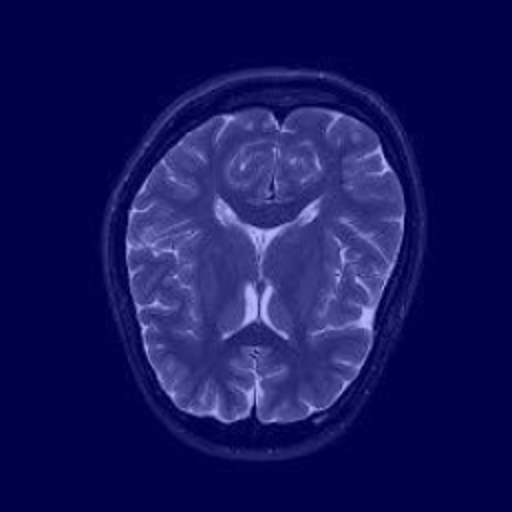

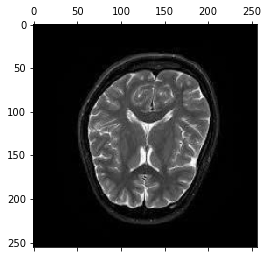

[0. 0. 0. 1.]


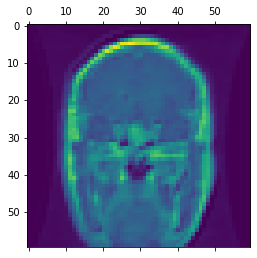

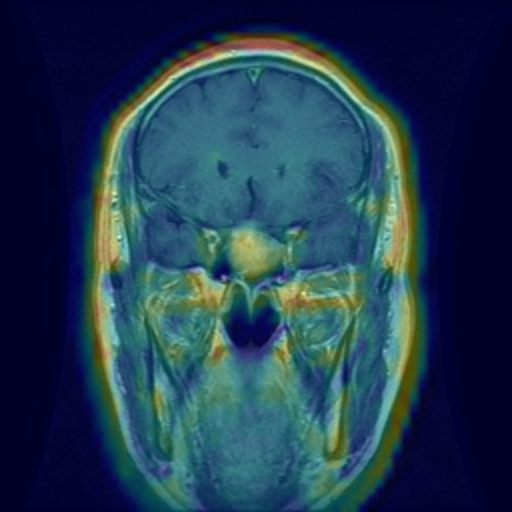

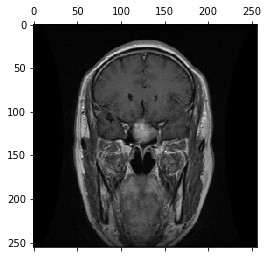

[1. 0. 0. 0.]


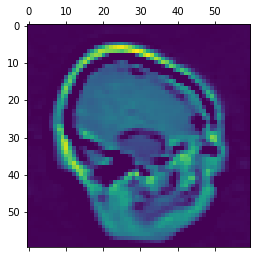

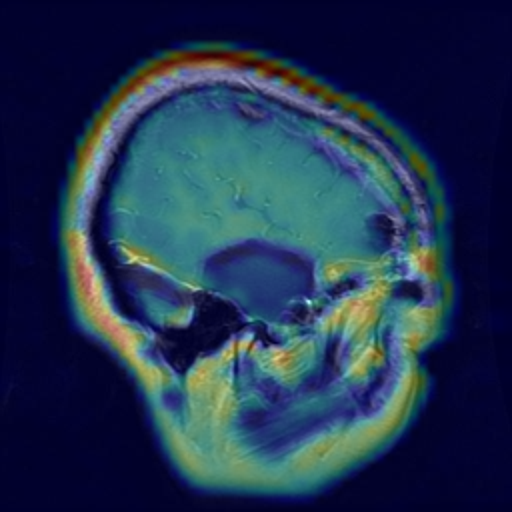

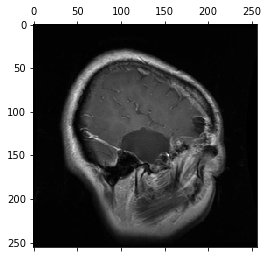

[0. 0. 1. 0.]


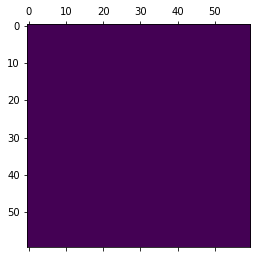

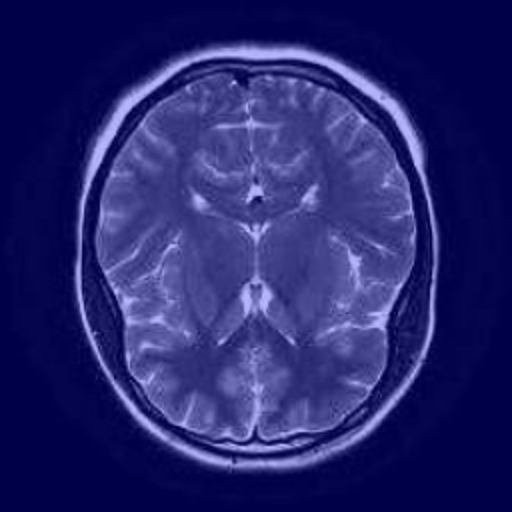

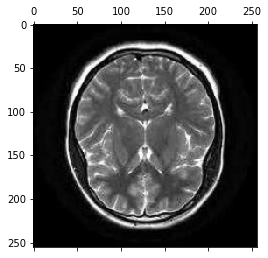

[0. 0. 0. 1.]


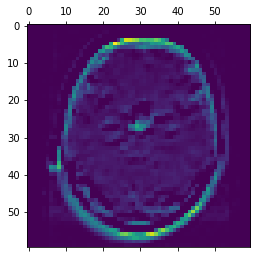

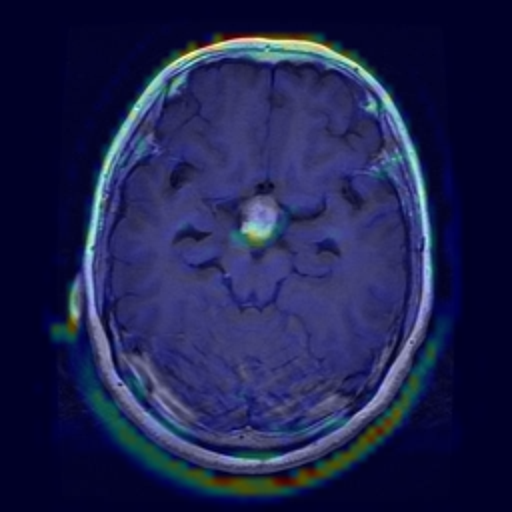

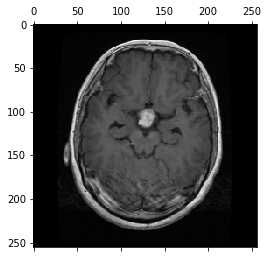

[0. 0. 1. 0.]


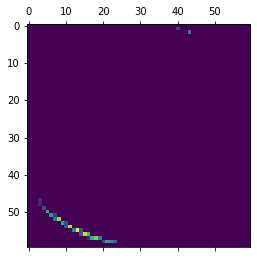

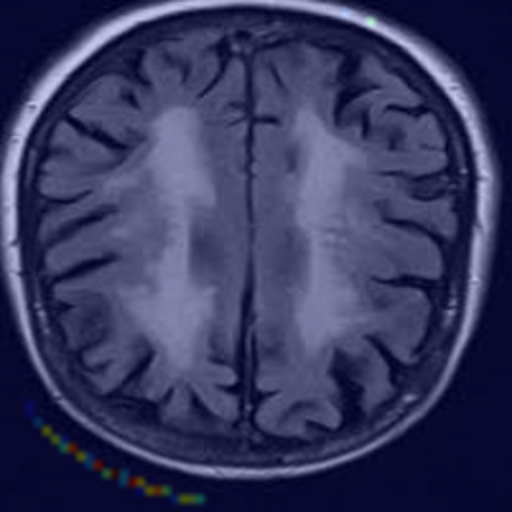

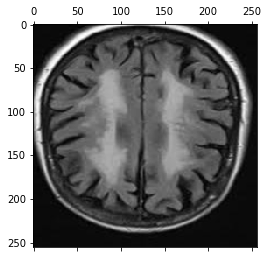

[0. 0. 1. 0.]


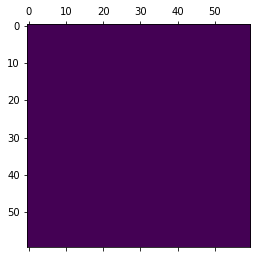

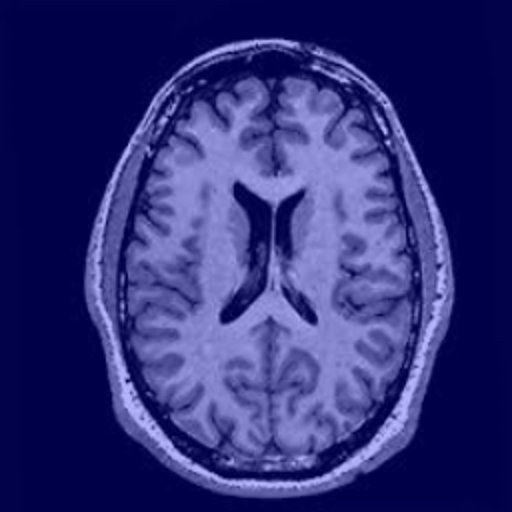

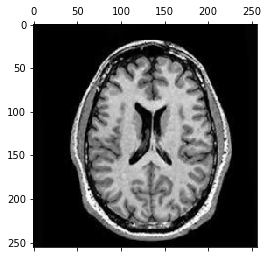

[0. 0. 1. 0.]


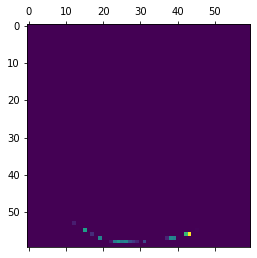

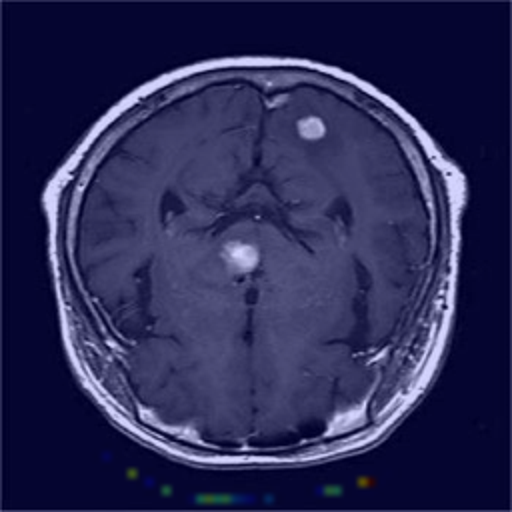

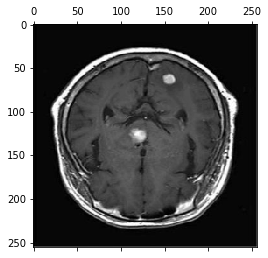

[0. 1. 0. 0.]


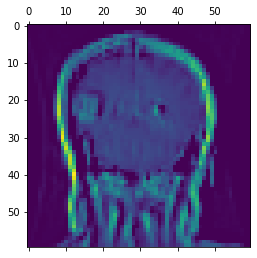

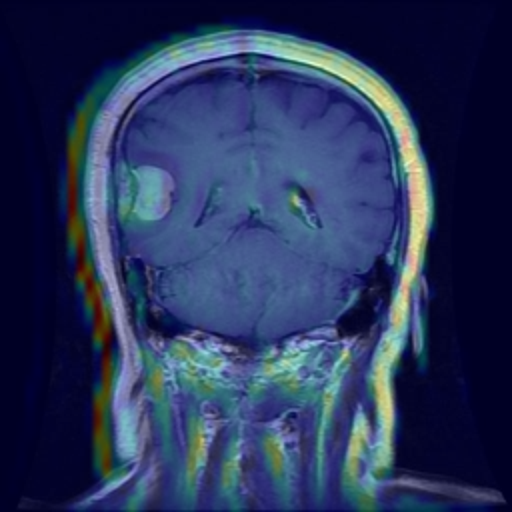

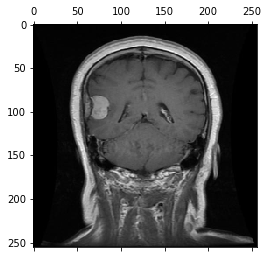

[0. 0. 1. 0.]


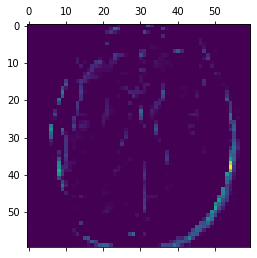

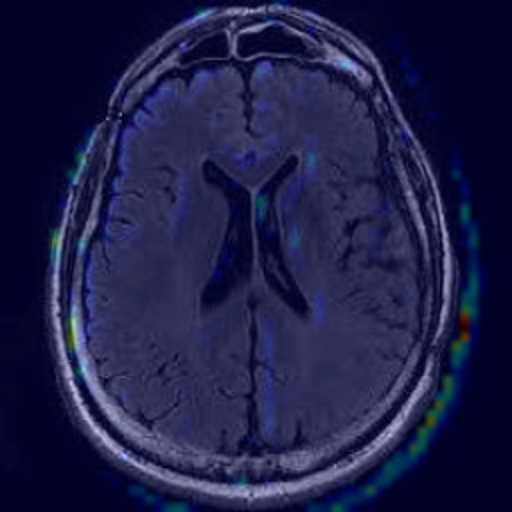

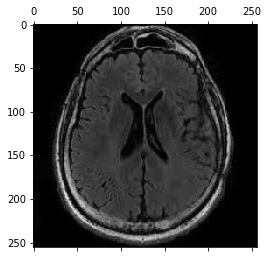

In [14]:
# Display 3 random image with different classes in test dataset, show their labels and superimposed image
for s in [1, 10, 50, 75, 80, 100, 132, 235, 267, 300, 367, 400, 468, 500]:
    test_img_index = s
    print(test_labels[test_img_index])    
    img = test_images[test_img_index,:,:, np.newaxis]
    img = expand_dims(img, axis=0)
    model = keras.Model(
        inputs=SIIM_custom_model.inputs,
        outputs=SIIM_custom_model.layers[-2].output,
    )
    heatmap = make_gradcam_heatmap(img, model, 'conv2d_2')
    plt.matshow(heatmap)
    plt.show()
    img = test_images[test_img_index,:,:].astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    save_and_display_gradcam(img, heatmap)

# Display confusion_matrix

In [21]:
ylabels = []
for i in test_labels:
    ylabels.append(np.where(i==1)[0][0])
mtx = confusion_matrix(ylabels, prediction)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Confusion matrix')
sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
plt.ylabel('true label')
plt.xlabel('predicted label')